In [2]:
# matplotlib 환경 설정
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['axes.grid'] = True 

In [3]:
!pip install environment_kernels

Using legacy 'setup.py install' for environment-kernels, since package 'wheel' is not installed.
    Running setup.py install for environment-kernels ... done
You should consider upgrading via the '/Users/jkkim/workspace/python/stock/venv/bin/python3.9 -m pip install --upgrade pip' command.


In [8]:
args = '--period=2022/01~2022/06 --initial_money=20 --strategy=2 --rebalance=3m --number=20 --fee=0.015'
args = args.split(' ')
args

['--period=2022/01~2022/06',
 '--initial_money=20',
 '--strategy=2',
 '--rebalance=3m',
 '--number=20',
 '--fee']

mode = Mode.MODULE
start: 2022y 1m
end: 2022y 12m
21_4Q_종합순위_220605_162815.xlsx


/Users/jkkim/workspace/python/stock/marcap/marcap_utils.py:29: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file, dtype=dtypes, parse_dates=['Date'])


MDD = -0.308283
mode = Mode.MODULE
(mode == Mode.MODULE) = True


<AxesSubplot:title={'center':'MDD'}, xlabel='Date'>

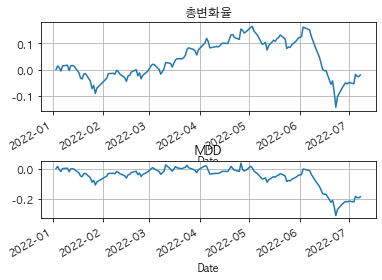

In [3]:
# matplotlib 환경 설정
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['axes.grid'] = True 

from my.backtest import (backtest)

args = '--period=2022/01~2022/06 --initial_money=20 --strategy=2 --rebalance=12m --number=20'
args = args.split(' ')
result = backtest(args)

plt.subplot(211)
result['총변화율'].plot(title='총변화율')
plt.subplot(313)
result['MDD'].plot(title='MDD')

